In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [ ]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#data exploration and preprocessing
house_df.shape

(506, 14)

In [ ]:
#check null values
house_df.isnull().values.any()

False

In [ ]:
#descriptive statistics
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


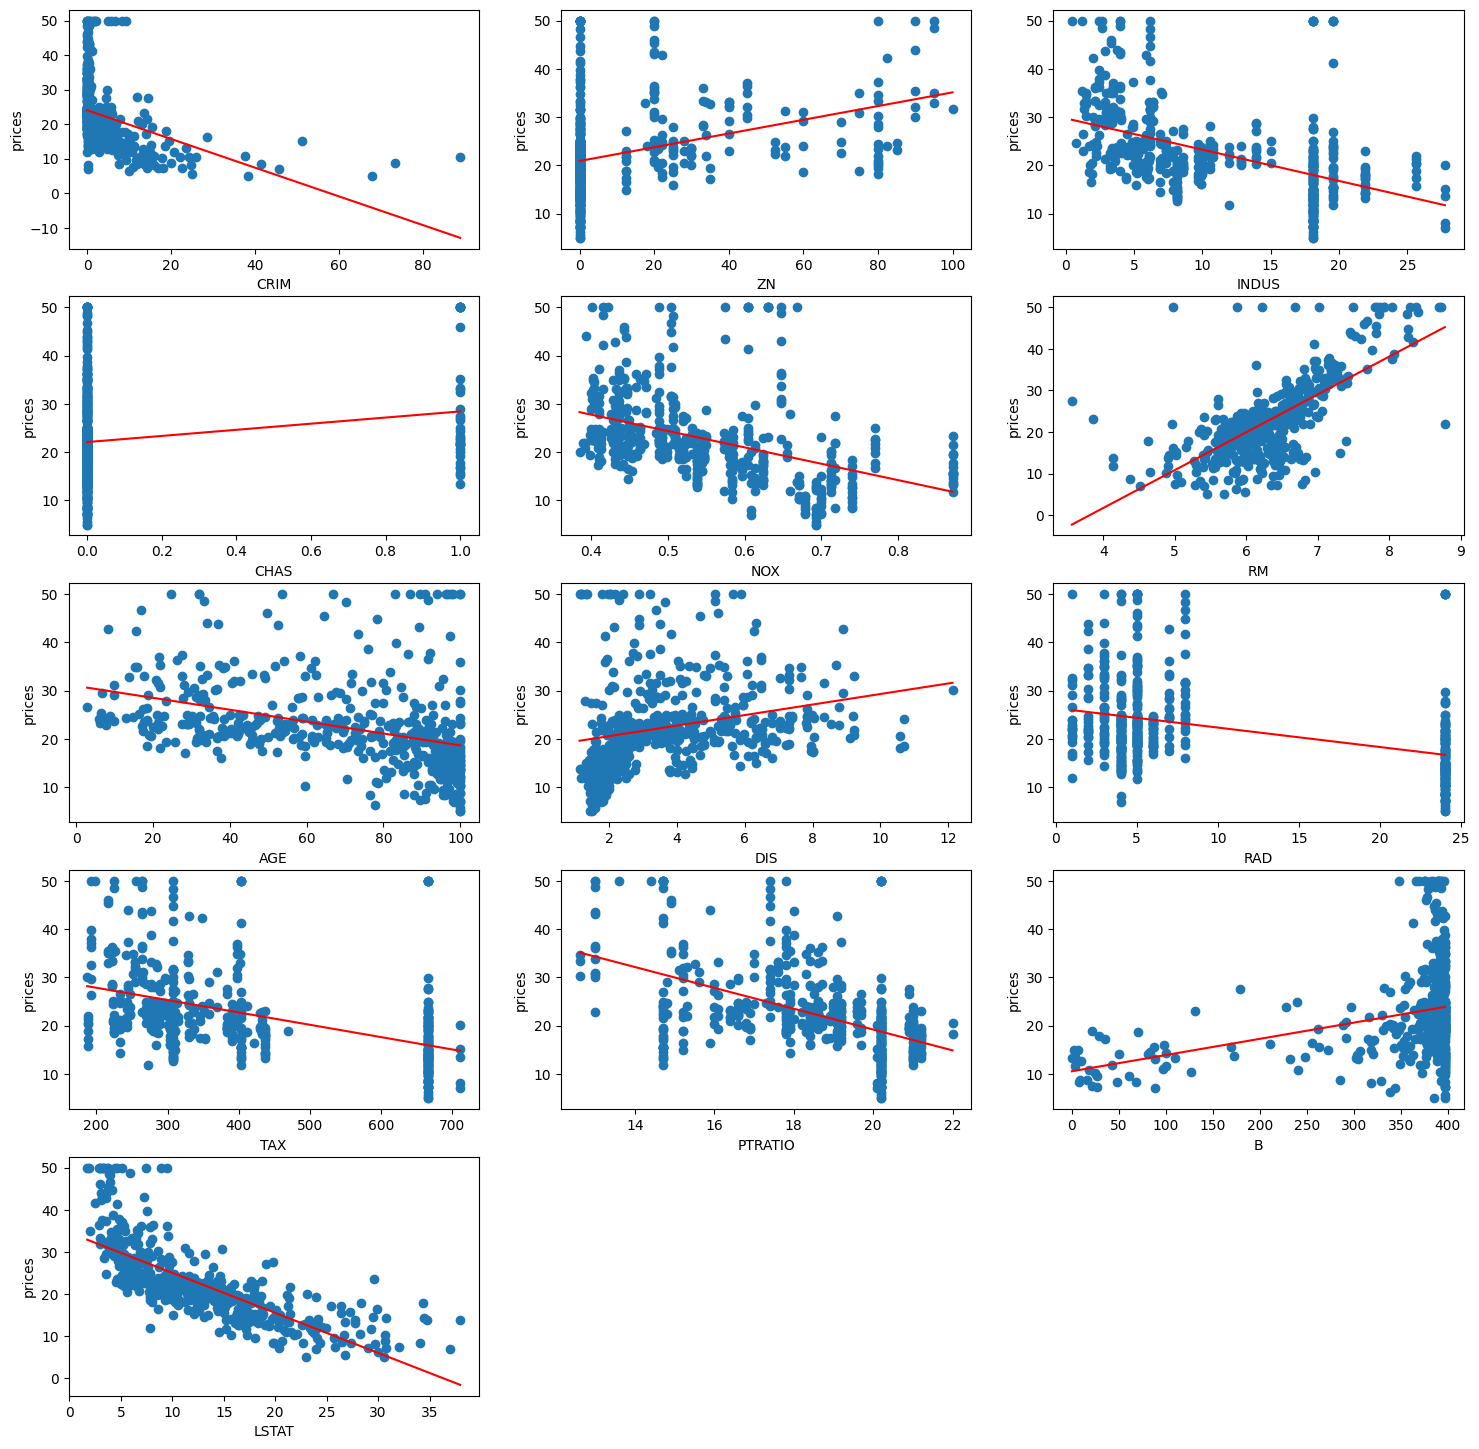

In [ ]:
# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label

In [ ]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [ ]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [ ]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values,
                                                    test_size=0.2, random_state=42)
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (404, 13)
testing data shape:  (102, 13)


In [ ]:
#get the input shape
no = X_train.shape[1]

In [ ]:
no

13

In [ ]:
#set random seed
tf.random.set_seed(42)
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(150,input_shape=(no,),activation='relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(1)#output node
])
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 150)               2100      
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 24901 (97.27 KB)
Trainable params: 24901 (97.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 22.6104 - mae: 22.6104
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 22.0254 - mae: 22.0254
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 21.2641 - mae: 21.2641
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 19.9656 - mae: 19.9656
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 17.1948 - mae: 17.1948
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 10.8955 - mae: 10.8955
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 6.5002 - mae: 6.5002
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6.3408 - mae: 6.3408
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 6.2725 - mae: 6.2725
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 6.2058 - mae: 6.2058
Epoch 11/100
13/13 [===========================

In [23]:
from tensorflow.keras.utils import plot_model

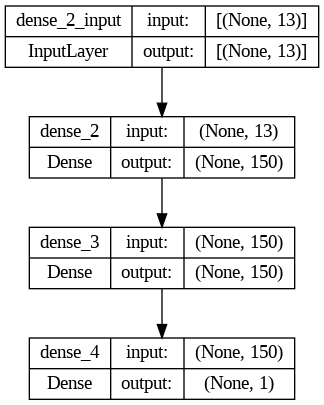

In [24]:
plot_model(model , show_shapes=True)

In [25]:
#make predictions
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [26]:
y_pred

array([[22.118267 ],
       [24.507568 ],
       [16.861778 ],
       [23.261253 ],
       [17.181879 ],
       [20.243753 ],
       [21.765057 ],
       [19.486355 ],
       [17.40366  ],
       [20.677572 ],
       [22.082972 ],
       [21.764252 ],
       [10.7878475],
       [20.812965 ],
       [22.317339 ],
       [17.313623 ],
       [23.012743 ],
       [16.745026 ],
       [25.04327  ],
       [17.278395 ],
       [24.990448 ],
       [24.466106 ],
       [20.872637 ],
       [22.674904 ],
       [16.039602 ],
       [16.583555 ],
       [21.286963 ],
       [ 9.256667 ],
       [22.06377  ],
       [20.826653 ],
       [21.971577 ],
       [22.890959 ],
       [17.292387 ],
       [17.131062 ],
       [16.209574 ],
       [17.097754 ],
       [23.467197 ],
       [24.015305 ],
       [22.565662 ],
       [23.049213 ],
       [20.69691  ],
       [24.161362 ],
       [25.731112 ],
       [22.30447  ],
       [22.84171  ],
       [17.273045 ],
       [20.89207  ],
       [23.15

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
test_mse_score, test_mae_score = model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 10ms/step - loss: 4.5578 - mae: 4.5578


In [29]:
y_test.shape,y_pred.shape

((102,), (102, 1))

In [30]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.55782>

In [31]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=51.952538>

In [34]:
#MODEL-2
#set random seed
tf.random.set_seed(42)
#create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,input_shape=(no,),activation='relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(1)#output node
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])


In [35]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 150)               2100      
                                                                 
 dense_11 (Dense)            (None, 150)               22650     
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 dense_13 (Dense)            (None, 150)               22650     
                                                                 
 dense_14 (Dense)            (None, 1)                 151       
                                                                 
Total params: 70201 (274.22 KB)
Trainable params: 70201 (274.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 22.0617 - mae: 22.0617
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 16.2155 - mae: 16.2155
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 7.4937 - mae: 7.4937
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 7.0056 - mae: 7.0056
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 6.5773 - mae: 6.5773
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 6.1638 - mae: 6.1638
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7748 - mae: 5.7748
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 5.6190 - mae: 5.6190
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5513 - mae: 5.5513
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5175 - mae: 5.5175
Epoch 11/100
13/13 [==============================] - 0

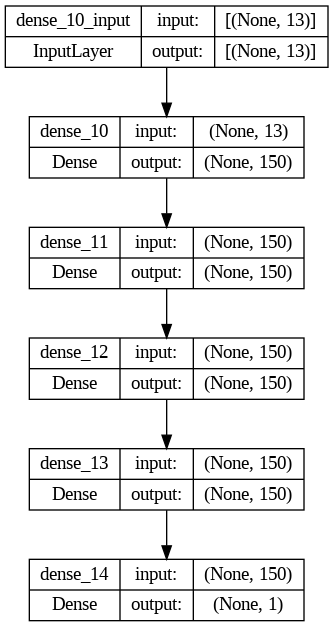

In [38]:
plot_model(model_2 , show_shapes=True)

In [42]:
#make predictions
y_pred2 = model_2.predict(X_test)
y_pred2

4/4 [==============================] - 0s 4ms/step


array([[22.399078 ],
       [32.085808 ],
       [15.069709 ],
       [22.053957 ],
       [14.83808  ],
       [17.645153 ],
       [15.38971  ],
       [13.125995 ],
       [17.647057 ],
       [17.49991  ],
       [17.659544 ],
       [15.638453 ],
       [ 5.1512055],
       [17.439066 ],
       [18.32677  ],
       [18.169388 ],
       [18.60148  ],
       [ 9.987203 ],
       [37.017487 ],
       [13.959675 ],
       [22.970057 ],
       [22.993458 ],
       [12.436941 ],
       [19.985365 ],
       [14.319665 ],
       [13.330533 ],
       [19.465395 ],
       [10.852563 ],
       [17.182129 ],
       [17.401546 ],
       [18.552536 ],
       [21.430338 ],
       [14.559126 ],
       [19.782852 ],
       [12.900413 ],
       [14.3758545],
       [27.08745  ],
       [20.448692 ],
       [17.726337 ],
       [20.154764 ],
       [14.074051 ],
       [31.99719  ],
       [42.559593 ],
       [16.846708 ],
       [21.475405 ],
       [14.700337 ],
       [14.222075 ],
       [21.06

In [43]:
mae2 = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred2.squeeze())
mae2

<tf.Tensor: shape=(), dtype=float32, numpy=3.356128>

In [44]:
mse2 = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred2.squeeze())
mse2

<tf.Tensor: shape=(), dtype=float32, numpy=25.366354>

In [45]:
#MODEL-3
#set random seed
tf.random.set_seed(42)
#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,input_shape=(no,),activation='relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(150,activation = 'relu'),
    tf.keras.layers.Dense(1)#output node
])
model_3.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

In [46]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 150)               2100      
                                                                 
 dense_16 (Dense)            (None, 150)               22650     
                                                                 
 dense_17 (Dense)            (None, 150)               22650     
                                                                 
 dense_18 (Dense)            (None, 150)               22650     
                                                                 
 dense_19 (Dense)            (None, 150)               22650     
                                                                 
 dense_20 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92851 (362.70 KB)
Trainable params: 9285

In [47]:
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

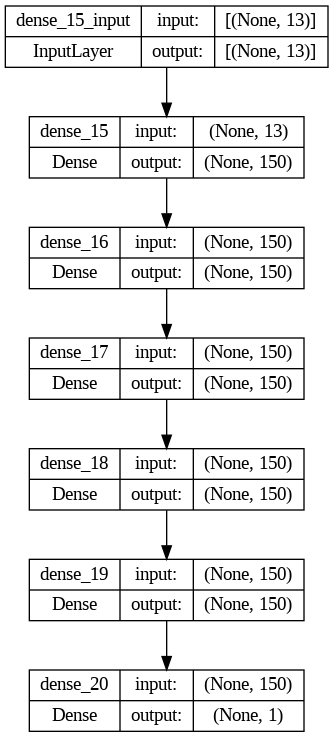

In [49]:
plot_model(model_3 , show_shapes=True)

In [50]:
#make predictions
y_pred3 = model_3.predict(X_test)
y_pred3

4/4 [==============================] - 0s 3ms/step


array([[21.541058 ],
       [31.61162  ],
       [13.427252 ],
       [22.93914  ],
       [13.582421 ],
       [17.954832 ],
       [16.554424 ],
       [13.837346 ],
       [17.05399  ],
       [18.437151 ],
       [18.636032 ],
       [16.767275 ],
       [ 7.7683015],
       [18.461775 ],
       [17.550638 ],
       [19.90929  ],
       [17.928381 ],
       [ 9.959814 ],
       [39.53759  ],
       [12.074892 ],
       [22.655087 ],
       [22.817537 ],
       [13.137254 ],
       [19.045624 ],
       [14.607252 ],
       [11.768036 ],
       [19.644352 ],
       [12.515303 ],
       [17.276306 ],
       [18.427668 ],
       [17.96603  ],
       [20.625357 ],
       [17.473083 ],
       [19.318674 ],
       [11.332063 ],
       [15.407791 ],
       [25.293005 ],
       [18.552055 ],
       [19.672197 ],
       [22.261305 ],
       [16.088266 ],
       [29.530537 ],
       [42.015423 ],
       [19.82056  ],
       [19.94157  ],
       [12.960745 ],
       [13.330126 ],
       [22.70

In [51]:
mae3 = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred3.squeeze())
mae3

<tf.Tensor: shape=(), dtype=float32, numpy=3.0527399>

In [52]:
mse3 = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred3.squeeze())
mse3

<tf.Tensor: shape=(), dtype=float32, numpy=20.295221>

In [55]:
#Comparing the results of all 3 models
model_results = [["model_1",mae.numpy(),mse.numpy()],
                 ["model_2",mae2.numpy(),mse2.numpy()],
                 ["model_3",mae3.numpy(),mse3.numpy()]

]

In [56]:
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,4.557820,51.952538
1,model_2,3.356128,25.366354
2,model_3,3.052740,20.295221


**Model 3** is the Best one among the three as mae and mse are both the lowest in it.

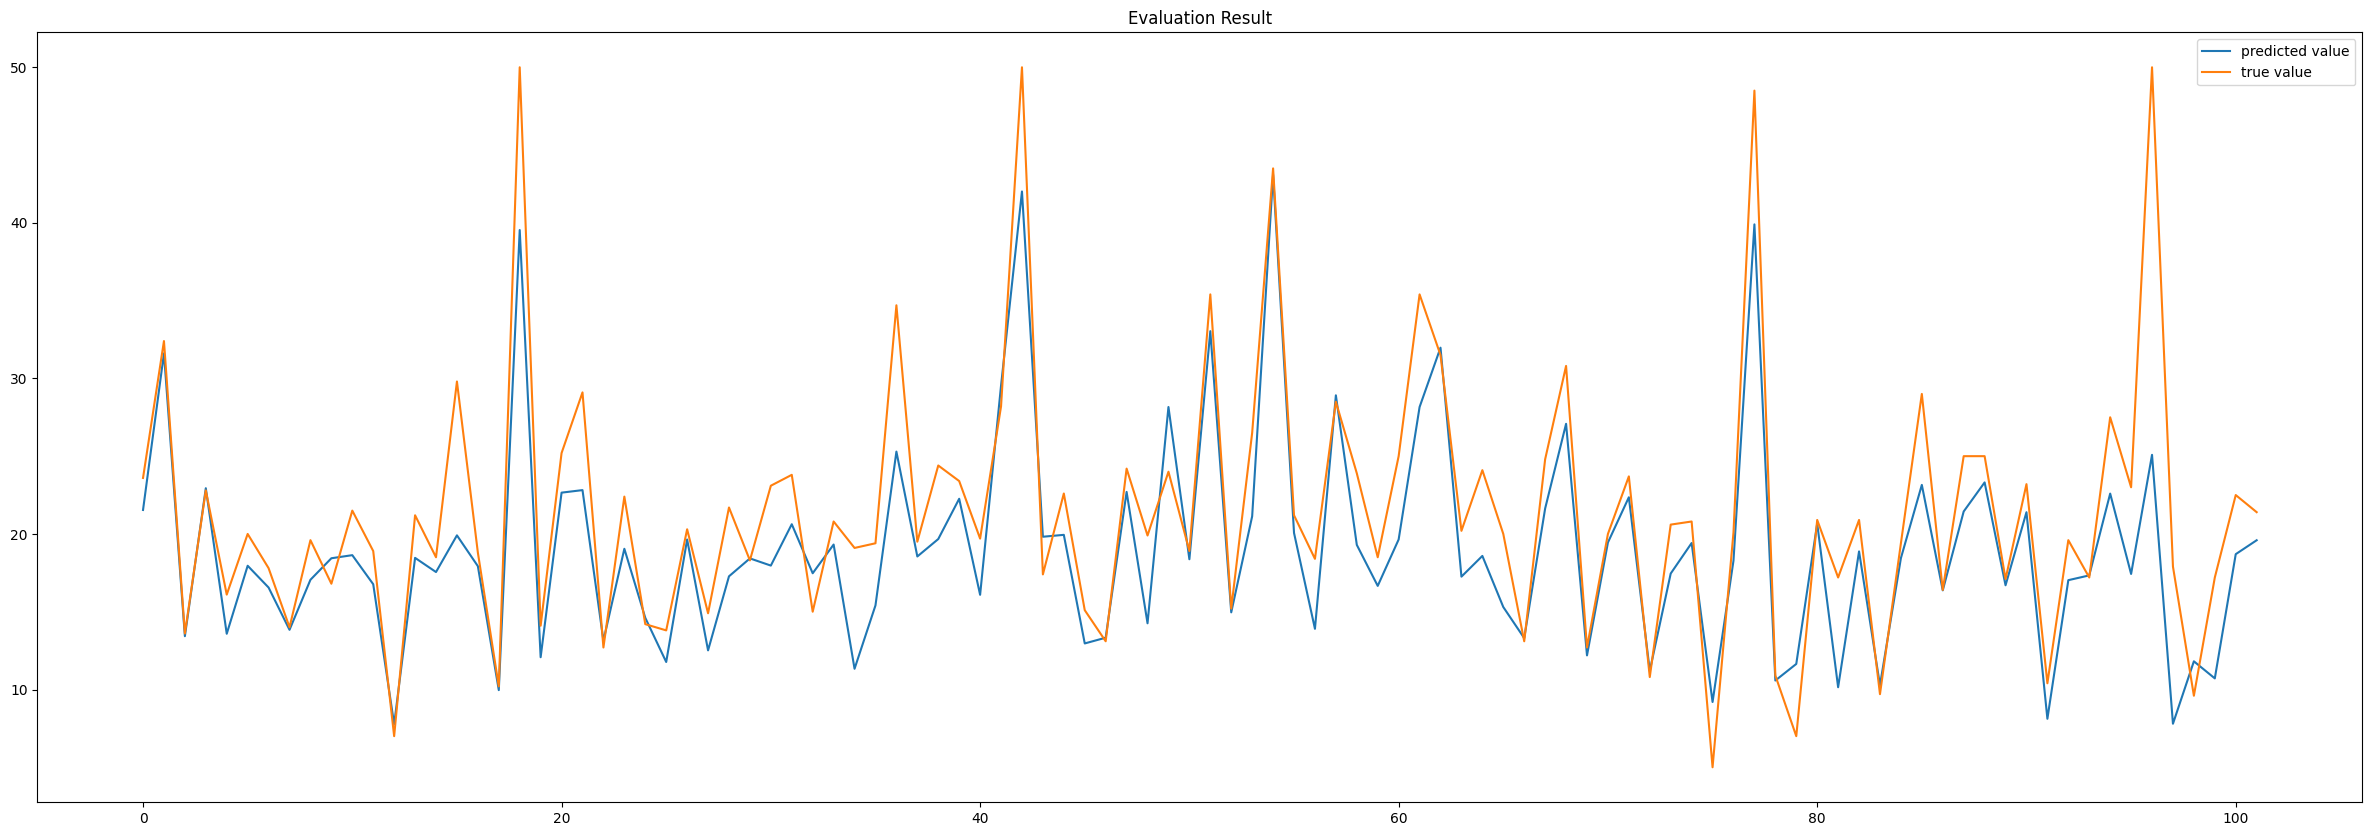

In [57]:
#visiulize the true value with predicted value (using line graph)
x = y_pred3
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

In [59]:
history3=model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

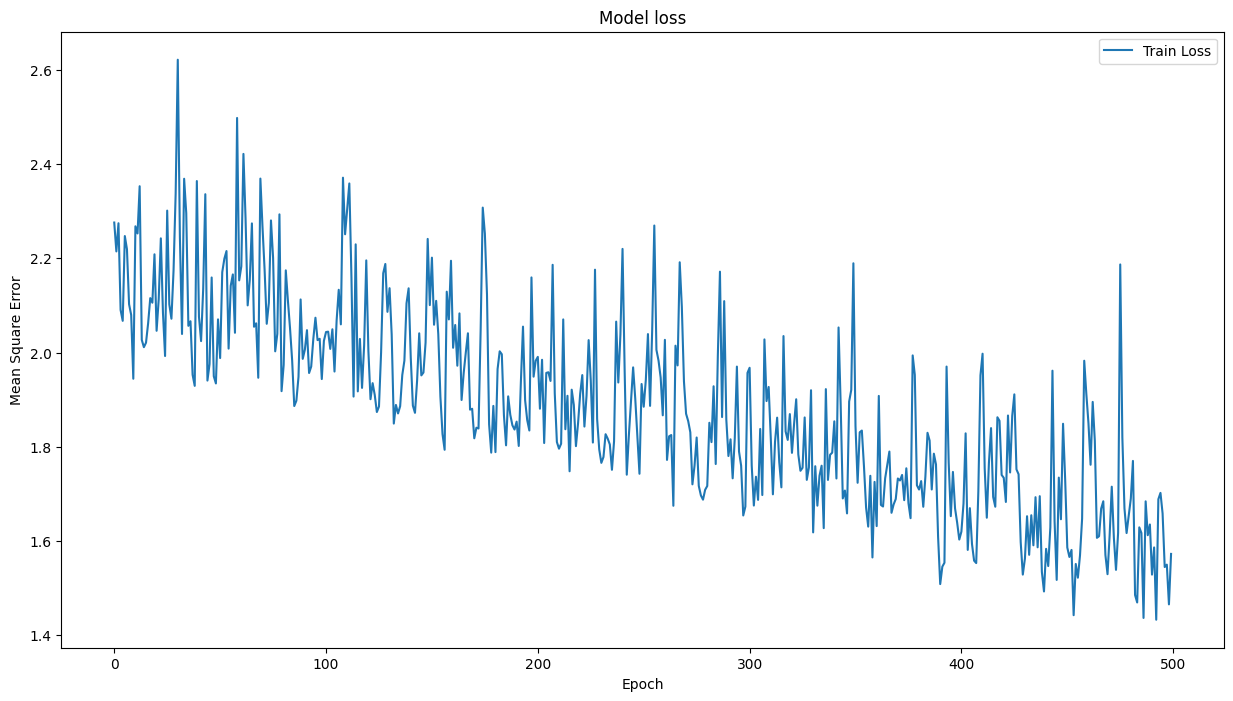

In [62]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history3.epoch, history3.history['loss'],
           label='Train Loss')
plt.title('Model loss')
plt.legend()